<a href="https://colab.research.google.com/github/Jenn-mawia/Statistical-Inferential-Data-Analysis-and-Hypothesis-testing-on-Autolib-electric-car-sharing/blob/master/Statistical_EDA_%26_Hypothesis_testing_on_Autolib's_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

sns.set_style()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The data used for this analysis is from Autolib electric car sharing company and can be found on the following [link](http://bit.ly/DSCoreAutolibDataset) together with its [description](http://bit.ly/DSCoreAutolibDatasetGlossary) here.

# Reading the data from csv file

In [ ]:
df = pd.read_csv("autolib_daily_events_postal_code.csv")

# Checking the data

In [ ]:
# number of rows and columns of the data
df.shape

(16085, 13)

In [ ]:
# preview first 5 rows(the top of the dataset)
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# previewing the bottom of the dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# checking the datatype of each column
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# Data Cleaning

## **Null Values**

In [ ]:
# check for null values
df.isnull().sum()

# there aren't any null values in the data

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

## **Duplicate entries**

In [ ]:
# check for any duplicated entries
df.duplicated().sum()

# none is found

0

## **Uniformity**

In [ ]:
# fixing messy column names and ensuring they are in same format using strip(), lower(), replace() functions
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# preview column names to see changes made
print(df.columns)

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')


## **Ouliers**

Size of dataset with outliers: (16085, 13)
...................
Size of dataset after removal of outliers: (9783, 13)


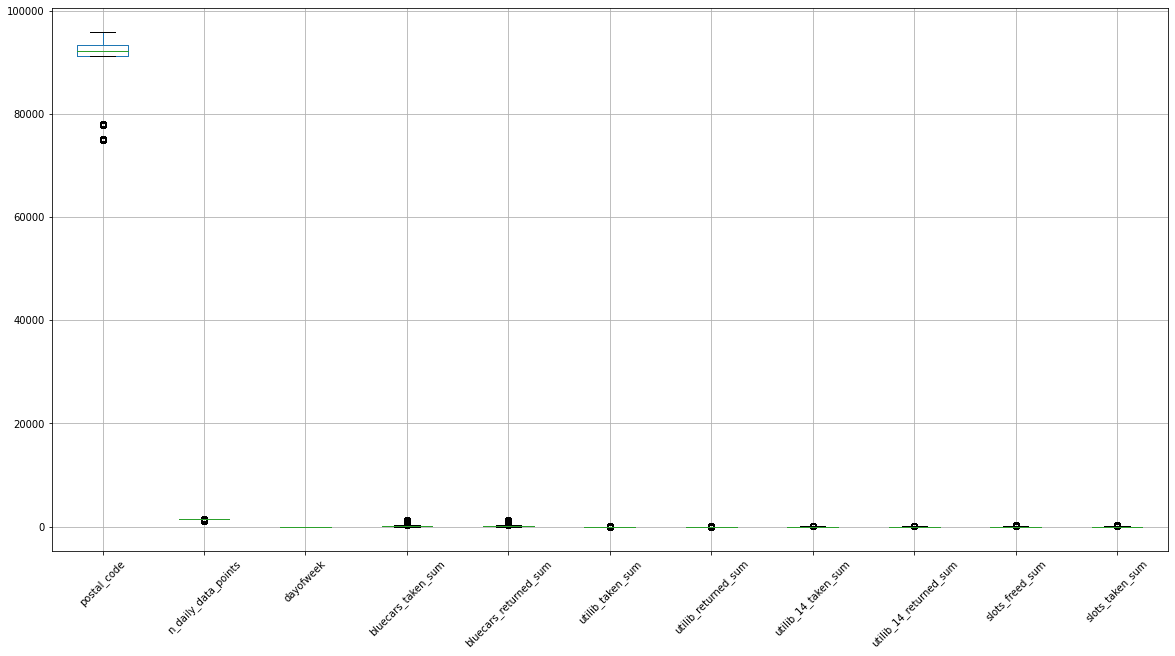

In [ ]:
# check for outliers

# set the size of the figure to be plotted
plt.figure(figsize=(20,10))
# plot a box and whisker plot to look at present outliers
df.boxplot()

plt.xticks(rotation=45)

# print the size of dataset with outliers present in the data 
print(f"Size of dataset with outliers: {df.shape}")

# # dealing with outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("...................")
# print size of the data after removal of outliers
print(f"Size of dataset after removal of outliers: {df.shape}")

## **Anomalies**

In [ ]:
# checking for anomalies

# find quartile ranges for the column sum of bluecars_taken
q1_bluecars_taken = df['bluecars_taken_sum'].quantile(.25)
q3_bluecars_taken = df['bluecars_taken_sum'].quantile(.75)

# calculating inter-quartile range using values from above
iqr_bluecars_taken = q3_bluecars_taken - q1_bluecars_taken

# another way is to find quantiles using the percentiles from the numpy library
q1_b_taken, q3_b_taken = np.percentile(df['bluecars_taken_sum'], [25, 75]) 
# IQR
iqr_b_taken = q3_b_taken - q1_b_taken

# compare if the two values are similar
print(iqr_bluecars_taken, iqr_b_taken)

50.0 50.0


## Data-type conversion

In [ ]:
# change datatypes of the date column

df['date'] = pd.to_datetime(df['date'])

# check the changes made on the datatype
df.dtypes

postal_code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayofweek                          int64
day_type                          object
bluecars_taken_sum                 int64
bluecars_returned_sum              int64
utilib_taken_sum                   int64
utilib_returned_sum                int64
utilib_14_taken_sum                int64
utilib_14_returned_sum             int64
slots_freed_sum                    int64
slots_taken_sum                    int64
dtype: object

**Exporting the clean dataset as a csv file**

In [ ]:
# export the cleaned data onto a new csv file
df.to_csv("autolib.csv")

# read the new csv file using pandas library
df1 = pd.read_csv("autolib.csv")

# preview first 5 rows
print(df1.head())

# remove the first column-not important
autolib = df1.drop(df1.columns[0], axis=1)
autolib.head()

   Unnamed: 0  postal_code  ... slots_freed_sum  slots_taken_sum
0        3899        91330  ...               4                2
1        3900        91330  ...               0                0
2        3901        91330  ...               1                1
3        3903        91330  ...               1                1
4        3905        91330  ...               4                2

[5 rows x 14 columns]


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,91330,2018-01-01,1440,0,weekday,19,9,0,0,0,0,4,2
1,91330,2018-01-02,1438,1,weekday,10,10,0,0,0,0,0,0
2,91330,2018-01-03,1439,2,weekday,11,13,0,0,0,0,1,1
3,91330,2018-01-05,1440,4,weekday,10,6,0,0,0,0,1,1
4,91330,2018-01-07,1440,6,weekend,28,17,0,0,1,1,4,2


# EXPLORATORY DATA ANALYSIS

## Univariate analysis

Text(0, 0.5, 'Frequency/count')

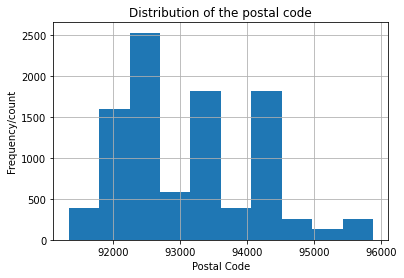

In [ ]:
# analysis on postal code

# plot a histogram plot for the postal code
autolib['postal_code'].hist()

# formatting and labelling axes
plt.title('Distribution of the postal code')
plt.xlabel('Postal Code')
plt.ylabel('Frequency/count')


The mean is: 49.22232444035572
The median is: 34.0


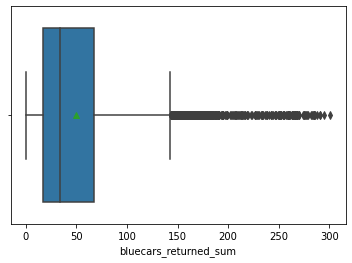

In [ ]:
# analysis on bluecars

# box plot of the distribution of the sum of bluecars returned
sns.boxplot(autolib['bluecars_returned_sum'], showmeans=True)

print(f"The mean is: {autolib['bluecars_returned_sum'].mean()}")
print(f"The median is: {autolib['bluecars_returned_sum'].median()}")

The mean is: 49.242870285188594
The median is: 34.0


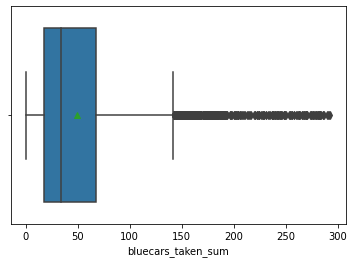

In [ ]:
# boxplot of sum of bluecars taken
sns.boxplot(autolib['bluecars_taken_sum'], showmeans=True)

print(f"The mean is: {autolib['bluecars_taken_sum'].mean()}")
print(f"The median is: {autolib['bluecars_taken_sum'].median()}")

The mean is: 3.568230604109169
The median is: 2.0


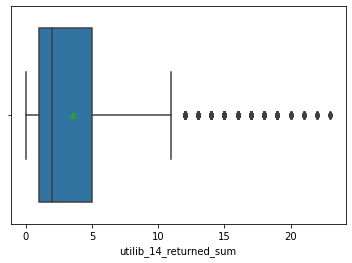

In [ ]:
# boxplot of sum of utilib14 cars returned
sns.boxplot(autolib['utilib_14_returned_sum'], showmeans=True)

print(f"The mean is: {autolib['utilib_14_returned_sum'].mean()}")
print(f"The median is: {autolib['utilib_14_returned_sum'].median()}")

The mean is: 3.5671062046407034
The median is: 2.0


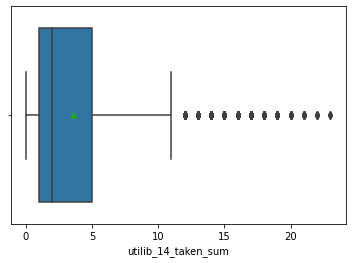

In [ ]:
# boxplot of the sum of utilib14 cars taken
sns.boxplot(autolib['utilib_14_taken_sum'], showmeans=True)

print(f"The mean is: {autolib['utilib_14_taken_sum'].mean()}")
print(f"The median is: {autolib['utilib_14_taken_sum'].median()}")

The mean is: 1.494326893590923
The median is: 1.0


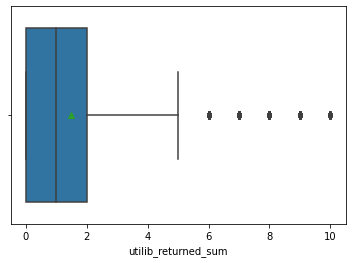

In [ ]:
# boxplot of utilib cares returned
sns.boxplot(autolib['utilib_returned_sum'], showmeans=True)

print(f"The mean is: {autolib['utilib_returned_sum'].mean()}")
print(f"The median is: {autolib['utilib_returned_sum'].median()}")

The mean is: 1.4985178370642953
The median is: 1.0


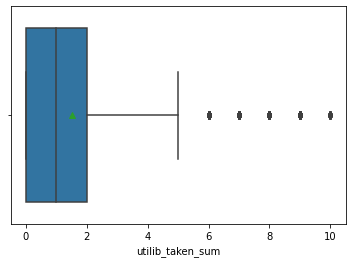

In [ ]:
# boxplot of utilib cars taken
sns.boxplot(autolib['utilib_taken_sum'], showmeans=True)

print(f"The mean is: {autolib['utilib_taken_sum'].mean()}")
print(f"The median is: {autolib['utilib_taken_sum'].median()}")
# from the plot most of the data falls within 0 and 2 cars taken in a day

The mean is: 0.694981089645303
The median is: 0.0


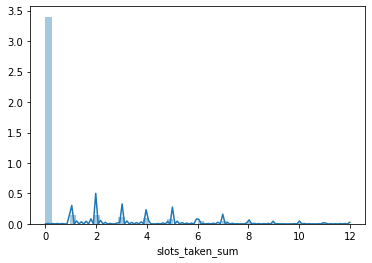

In [ ]:
ax = sns.distplot(autolib['slots_taken_sum'])
# sns.boxplot(autolib['slots_taken_sum'], showmeans=True)

print(f"The mean is: {autolib['slots_taken_sum'].mean()}")
print(f"The median is: {autolib['slots_taken_sum'].median()}")

The mean is: 0.6974343248492283
The median is: 0.0


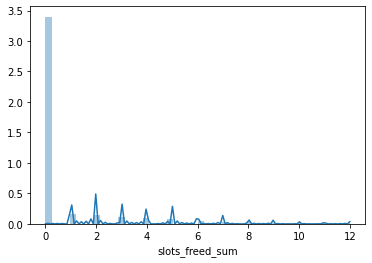

In [ ]:
ax = sns.distplot(autolib['slots_freed_sum'])
# sns.boxplot(autolib['slots_freed_sum'], showmeans=True)

print(f"The mean is: {autolib['slots_freed_sum'].mean()}")
print(f"The median is: {autolib['slots_freed_sum'].median()}")

**Findings from univariate analysis**

The number of BlueCars taken and returned falls between 10 and 60 per day with means of 49 cars and median 34

The number of Utilib14 cars taken and returned falls between 1 and 5 cars per day with a mean approximating 4 cars and median 2

The number of Utilib cars taken and returned falls between 0 and 2 cars per day with a mean approximating 1 car and median 1

- The most used cars are the BlueCars

## Bivariate Analysis

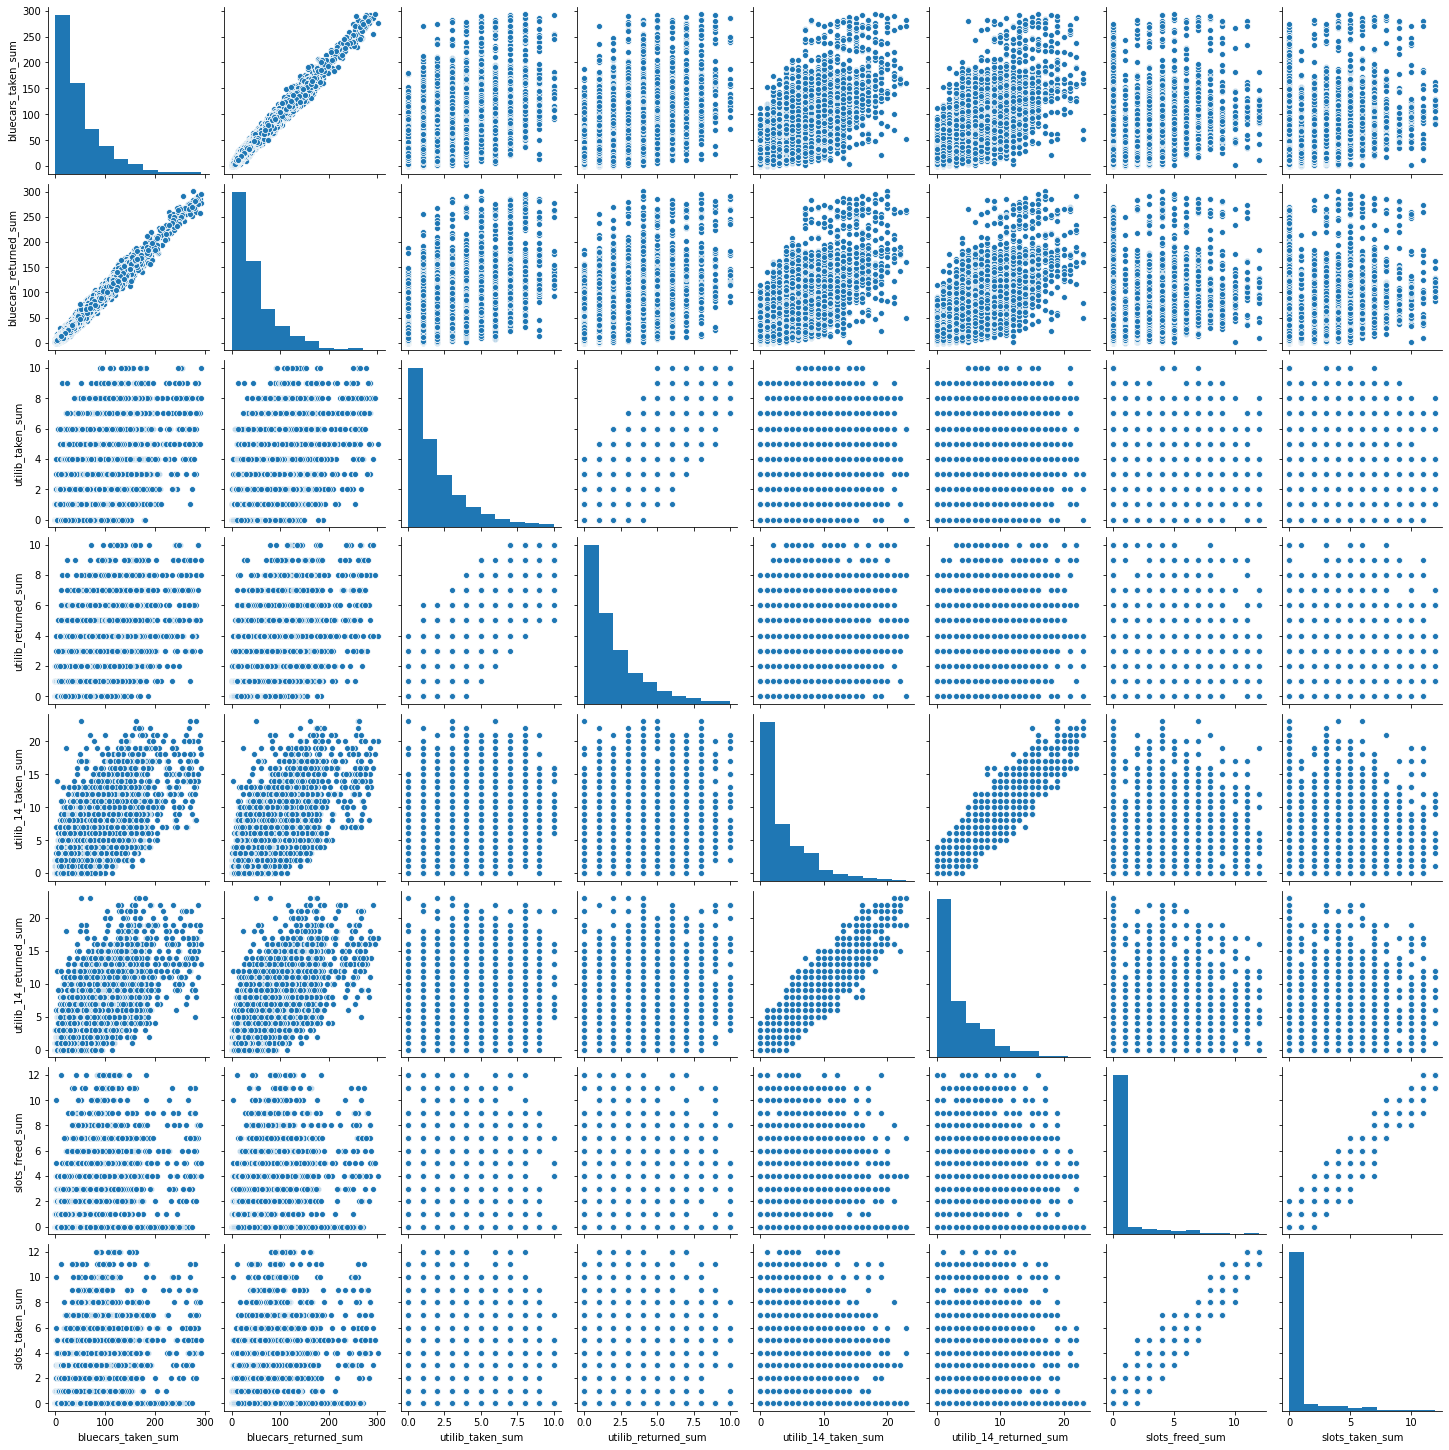

In [ ]:
# drop columns not needed in the plot
autolib_data = autolib.drop(['n_daily_data_points', 'date', 'day_type', 'dayofweek', 'postal_code'], axis=1)
# plot pairplot
sns.pairplot(autolib_data)



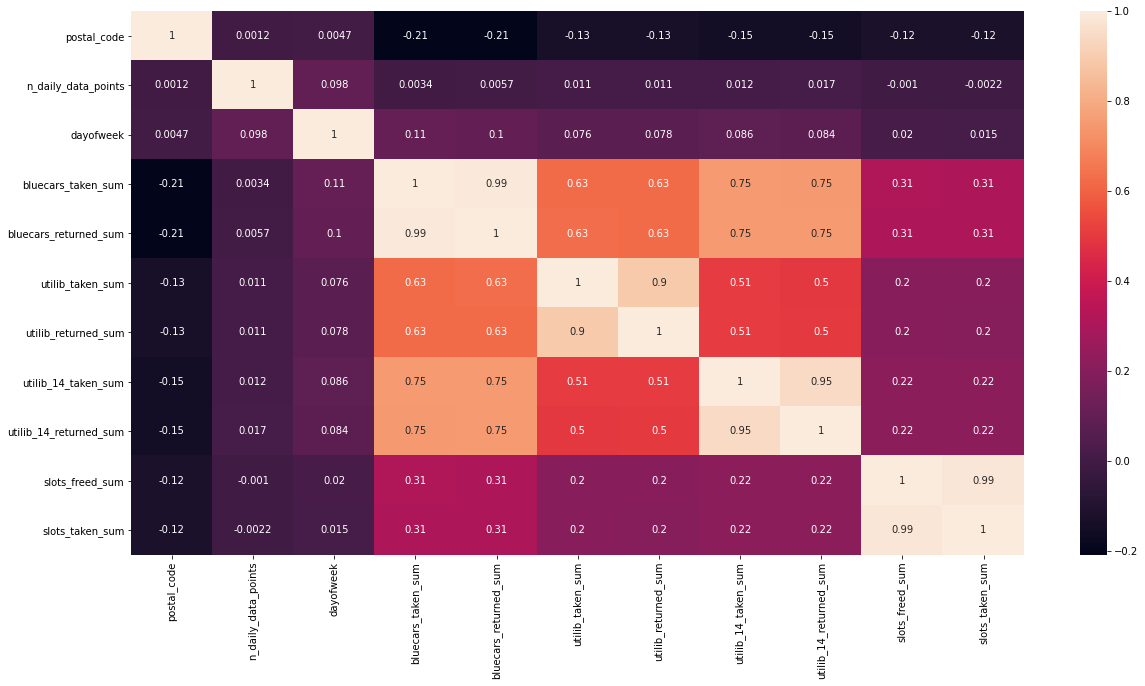

In [ ]:
# plot of correlation between the different fields present in the data
plt.figure(figsize=(20,10))
sns.heatmap(autolib.corr(), annot=True)

In [ ]:
autolib.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000
mean,93104.755188,1439.698457,2.979454,49.242870,49.222324,1.498518,1.494327,3.567106,3.568231,0.697434,0.694981
std,1012.235885,0.564981,2.074932,46.303795,46.223838,1.909304,1.891761,3.895220,3.898348,1.833390,1.828739
min,91330.000000,1438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92270.000000,1440.000000,1.000000,17.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,93110.000000,1440.000000,3.000000,34.000000,34.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,94100.000000,1440.000000,5.000000,67.000000,67.000000,2.000000,2.000000,5.000000,5.000000,0.000000,0.000000
max,95880.000000,1440.000000,6.000000,293.000000,301.000000,10.000000,10.000000,23.000000,23.000000,12.000000,12.000000


**Findings from the bivariate analysis**

There is a high correlation between the BlueCars, Utilib14 and Utilib cars both taken and returned with their correlations being above .5



# Hypothesis Testing

# **Hypothesis testing I**

I wish to assess whether there is a statistically significant difference in mean of the number of bluecars taken and returned in city X of area code 92380 during weekdays and using a 5% level of significance.

**Hypothesis statements:** 
- Null: mean of bluecars taken at area 92380 during weekdays is equal to the mean of bluecars returned
- Alternate: mean of bluecars taken at area 92380 during weekdays is not equal to the mean of bluecars returned

## Sampling

Simple random sampling is used in this case.

In [ ]:
# first step is to select the specific rows of the postal area code I am investigating
df = autolib[(autolib['postal_code']==92380)&(autolib['day_type']=='weekday')]

# preview the top of the data
df.head()


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
3647,92380,2018-01-01,1440,0,weekday,24,18,0,0,5,5,0,0
3648,92380,2018-01-02,1438,1,weekday,9,14,0,0,2,3,0,0
3649,92380,2018-01-03,1439,2,weekday,26,24,2,2,5,5,0,0
3650,92380,2018-01-05,1440,4,weekday,19,24,1,2,3,2,0,0
3652,92380,2018-01-08,1438,0,weekday,12,18,0,0,3,0,0,0


In [ ]:
# extract the specific columns I wish to investigate onto new and different dataframes
bluecars_taken = df['bluecars_taken_sum']
print(bluecars_taken.head())

print("...............")

bluecars_returned = df['bluecars_returned_sum']
print(bluecars_returned.head())

3647    24
3648     9
3649    26
3650    19
3652    12
Name: bluecars_taken_sum, dtype: int64
...............
3647    18
3648    14
3649    24
3650    24
3652    18
Name: bluecars_returned_sum, dtype: int64


In [ ]:
# next step is to choose 2 random sample groups of elements from the data 
# this is done using simple random sampling procedure

sample1 = bluecars_taken.sample(n =40, replace="False")

sample2 = bluecars_returned.sample(n=40, replace="False")


## **Normality test for the two samples chosen**

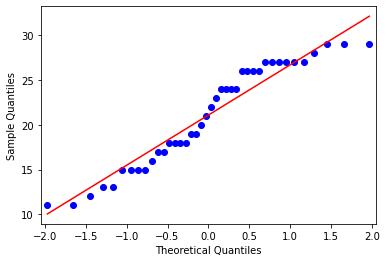

In [ ]:
# import the libraries to plot a Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# plot for the first sample
qqplot(sample1, line='s')
pyplot.show()

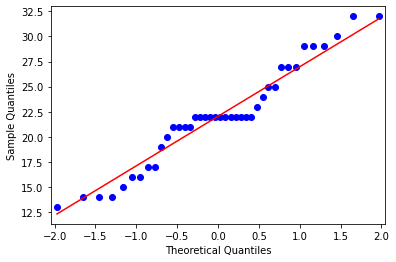

In [ ]:
# Q-Q plot for sample 2
qqplot(sample2, line='s')
pyplot.show()

From the two Q-Q plots, the data from both samples appears to be normally distributed about the mean

## Statistical Testing

In [ ]:
# the next step is then to compute the mean and standard deviation in each sample of Bluecars taken and returned
m1 = sample1.mean() #mean of the first sample
s1 = sample1.std() #standard deviation of first sample

print(f"The mean of bluecars taken (m1) is: {m1}")
print(f"The standard deviation (s1) is: {s1}")
print(f"The variance (var1) is: {sample1.var()}")

print("..............................")

# Bluecars returned
m2 = sample2.mean() #mean of bluecars returned
s2 = sample2.std() #standard deviation of second sample
print(f"The mean of bluecars returned(m2) is: {m2}")
print(f"The standard deviation (s2) is: {s2}")
print(f"The variance (var2) is: {sample2.var()}")


The mean of bluecars taken (m1) is: 21.075
The standard deviation (s1) is: 5.667665824432126
The variance (var1) is: 32.122435897435885
..............................
The mean of bluecars returned(m2) is: 22.05
The standard deviation (s2) is: 4.986905931459984
The variance (var2) is: 24.86923076923077


In [ ]:
# Before calculating the z-score, first check whether the assumption of equality of 
# population variances is reasonable. This is done by comparing the ratios from the two samples

sample_var_ratio = sample1.var()/sample2.var()
sample_var_ratio

# the sample variance ratio falls between 0.5 and 2.This means that the outcome is equally variable 
# in each of the comparison populations

1.2916537787400757

**Z-score**

This is a two-tailed test, using a Z statistic(since sample size > 30) and a 5% level of significance. 

The critical region defined for a two-tailed z-test at 0.05 significance level is 1.960. 

Therefore, Reject the null hypothesis if Z < -1.960 or is Z > 1.960.

In [ ]:
# a z-test of two independent samples is used since conditions are satisfied
alpha = 0.05 #significance level of 5% will be used
n1 = sample1.count() 
n2 = sample2.count() 

# the formula of the z-score used is a ratio of the difference between the two means to the ratio of the standard deviation of both populations
# this is defined by the formula: z = (m1-m2)/(sp*(math.sqrt((1/n1+1/n2))))
# where (m1-m2) is the difference of the two sample means
# sp is the pooled estimate of the common standard deviation and is a number between the standard deviation of the two samples
# s1 and s2 are the standard deviations of sample 1 and sample 2 respectively while n1 and n2 are the sample sizes

# calculate for the pooled estimate of the common stdev
import math
sp = math.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2)) 
print(f"The pooled estimate of the commom stdev is: {round(sp,3)}, which is a value between {round(s1, 3)} and {round(s2,3)}")

# calculate the z-score
z = (m1-m2)/(sp*(math.sqrt((1/n1+1/n2))))
print(f"The z-score statistic is: {z}")

The pooled estimate of the commom stdev is: 5.338, which is a value between 5.668 and 4.987
The z-score statistic is: -0.816824832768929


Since z = -0.816824832768929, it is greater than -1.960.Therefore, we fail to reject the null hypothesis

There is not enough statistical significance evidence at α=0.05 to show that there is a difference between the mean number of bluecars taken and returned during weekdays. 

**P-value**

In [ ]:
# pvalue

import statistics
from scipy.stats import norm

p = 1 -norm.cdf(z)
print(f"p-value is: {p}")

p-value is: 0.7929857306141336


In [ ]:
alpha = 0.05
if p < alpha:
  print("Reject null hypothesis and accept that mean of bluecars taken at area 92380 is not equal to the mean of bluecars returned-test is statistically significant")
elif  p > alpha:
  print("Fail to reject null hypothesis")

Fail to reject null hypothesis


Here again we find that there is not enough statistical evidence to show that there is no difference between mean of the number of bluecars taken and returned in that particular city.

There is not enough significant evidence to show that the alternate hypothesis (means are not equal) is true. We do not conclude that the null hypothesis (means are equal) is true.

We could also be committing a Type II error by failing to reject the null hypothesis when it is actually false. 
Notice that there is a very small difference in the sample means (22.05-21.075 = 0.98 which is equal to 1 car) which indicates a slight and negligible difference

# **Hypothesis tesing II**

I also wish to assess whether there is a statistically significant difference in mean of the number of bluecars taken between two cities X and Y of area codes 92380 and 92390 respectively over the weekend using a 5% level of significance.

**Hypothesis statements:** 
- Null: mean of bluecars taken at area 92380 during weekends is equal to the mean of bluecars taken at area 92390
- Alternate: mean of bluecars taken at area 92380 during weekends is not equal to the mean of bluecars taken at area 92390

I will also be finding out if it is greater in area X than in area Y? 

## Sampling

In [ ]:
# simple random sampling is also used for this test
# first step is to select the specific rows of the postal area codes I am investigating
df2 = autolib[(autolib['postal_code']==92380)&(autolib['day_type']=='weekend')]
df3 = autolib[(autolib['postal_code']==92390)&(autolib['day_type']=='weekend')]

# preview the top of the data
print(df2.head())
print(df3.head())

      postal_code        date  ...  slots_freed_sum  slots_taken_sum
3651        92380  2018-01-07  ...                0                0
3657        92380  2018-01-13  ...                0                0
3658        92380  2018-01-14  ...                0                0
3664        92380  2018-01-20  ...                0                0
3665        92380  2018-01-21  ...                0                0

[5 rows x 13 columns]
      postal_code        date  ...  slots_freed_sum  slots_taken_sum
3781        92390  2018-01-07  ...                2                2
3787        92390  2018-01-13  ...                0                0
3788        92390  2018-01-14  ...                0                0
3794        92390  2018-01-20  ...                0                0
3795        92390  2018-01-21  ...                0                0

[5 rows x 13 columns]


In [ ]:
# extract the specific columns I wish to investigate onto new and different dataframes
bluecars_taken_df2 = df2['bluecars_taken_sum']
print(bluecars_taken_df2.head())

print("...............")

bluecars_taken_df3 = df3['bluecars_taken_sum']
print(bluecars_taken_df3.head())

3651    24
3657    21
3658    33
3664    35
3665    33
Name: bluecars_taken_sum, dtype: int64
...............
3781    16
3787    16
3788     5
3794    15
3795    17
Name: bluecars_taken_sum, dtype: int64


In [ ]:
# choose 2 random sample groups of elements from the data 

sample_df2 = bluecars_taken_df2.sample(n =15, replace="False")

sample_df3 = bluecars_taken_df3.sample(n=15, replace="False")


## Normality test

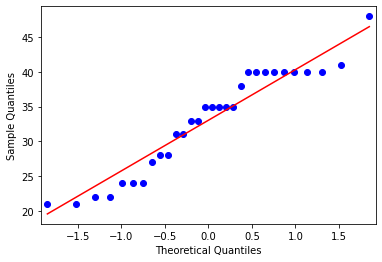

In [ ]:
# import the libraries to plot a Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# plot for the first sample
qqplot(sample_df2, line='s')
pyplot.show()

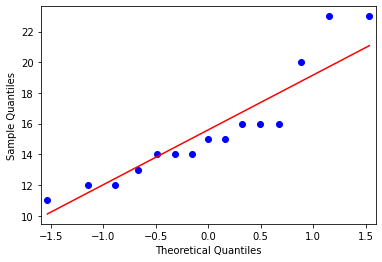

In [ ]:
# plot for the second sample
qqplot(sample_df3, line='s')
pyplot.show()

The two samples are distributed normally about the mean

## Statistical Testing

In [ ]:
# compute the mean and standard deviation in each sample of Bluecars taken in each area code
# code 92380
m1_df2 = sample_df2.mean() #mean of the first sample
s1_df2 = sample_df2.std() #standard deviation of first sample

print(f"The mean of bluecars taken (m1) at code 92380 is: {m1_df2}")
print(f"The standard deviation (s1) is: {s1_df2}")
print(f"The variance (var1) is: {sample_df2.var()}")

print("..............................")

# Bluecars taken -92390
m2_df3 = sample_df3.mean() #mean of bluecars taken
s2_df3 = sample_df3.std() #standard deviation of second sample
print(f"The mean of bluecars taken(m2) at 92390 is: {m2_df3}")
print(f"The standard deviation (s2) is: {s2_df3}")
print(f"The variance (var2) is: {sample_df3.var()}")

The mean of bluecars taken (m1) at code 92380 is: 31.0
The standard deviation (s1) is: 7.662524761087935
The variance (var1) is: 58.714285714285715
..............................
The mean of bluecars taken(m2) at 92390 is: 15.6
The standard deviation (s2) is: 3.699420804087349
The variance (var2) is: 13.685714285714287


**T-test**

This is a two-tailed test, using a t statistic(since sample size < 30) and a 5% level of significance. 

The critical region defined for a two-tailed t-test at 0.05 with degrees of freedom=28(n1+n2-2)is 2.048 

Therefore, Reject the null hypothesis if t < -2.048 or t > 2.048.

In [ ]:
# a t-test of two independent samples is used since conditions are satisfied
alpha = 0.05 #significance level of 5% will be used
n1_df2 = sample_df2.count() 
n2_df3 = sample_df3.count() 

# the formula of the t-score used is a ratio of the difference between the two means to the ratio of the standard deviation of both populations
# this is defined by the formula: t = (m1-m2)/(sp*(math.sqrt((1/n1+1/n2)))) where df = n1+n2-2
# where (m1-m2) is the difference of the two sample means
# sp is the pooled estimate of the common standard deviation and is a number between the standard deviation of the two samples
# s1 and s2 are the standard deviations of sample 1 and sample 2 respectively while n1 and n2 are the sample sizes

# calculate for the pooled estimate of the common stdev
import math
sp1 = math.sqrt(((n1_df2-1)*s1_df2**2+(n2_df3-1)*s2_df3**2)/(n1_df2+n2_df3-2)) 
print(f"The pooled estimate of the commom stdev is: {round(sp1,3)}, which is a value between {round(s1_df2, 3)} and {round(s2_df3,3)}")

# calculate the t-statistic
t = (m1_df2-m2_df3)/(sp1*(math.sqrt((1/n1_df2+1/n2_df3))))
print(f"The t-statistic is: {t}")

The pooled estimate of the commom stdev is: 6.017, which is a value between 7.663 and 3.699
The t-statistic is: 7.0096618403473725


Since t = 7.0096618403473725, it is greater than 2.048.Therefore, we reject the null hypothesis and accept the alternate hypothesis that mean of bluecars taken at area 92380 during weekends is not equal to the mean of bluecars taken at area 92390. 


There is enough statistical significance evidence at α=0.05 to show that there is a difference between the mean number of bluecars taken in area 92380 and 92390. 

**P-value**

In [ ]:
p = 1 -norm.cdf(t)
print(f"p-value is: {p}")

p-value is: 1.194488952194206e-12


In [ ]:
alpha = 0.05
if p < alpha:
  print("Reject null hypothesis and accept the alternate hypothesis")
elif  p > alpha:
  print("Fail to reject null hypothesis")

Reject null hypothesis and accept the alternate hypothesis


Here again we find that there is a statistically significant difference in mean number of bluecars taken between city X and city Y of area codes 92380 and 92390 repectively. 

Notice that there is a very small difference in the sample means (31.0-15.6 = 15.4 = 15 cars), but this difference is beyond what would be expected by chance

**Is the mean of bluecars taken greater in area X than in area Y?**

In [ ]:
difference = m1_df2 - m2_df3
print(difference)
print(f"The mean of bluecars taken over the weekends in area X is greater than in area Y by: {difference}")

15.4
The mean of bluecars taken over the weekends in area X is greater than in area Y by: 15.4
